<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [4]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='https://helios.ntua.gr/pluginfile.php/43944/mod_assign/intro/football.gml'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr>
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr>
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4>
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [14]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4 # watts_strogatz_graph parameter k for SW network
seedno=5
random.seed(seedno)


#Connectivity
def connectivity(G, name):
    if nx.is_connected(G)==True:
        print("Graph {} is connected".format(name))
    else:
        print("Graph {} is not connected".format(name))

REG = nx.watts_strogatz_graph(n, d, 0, seed=seedno)
connectivity(REG, 'REG')
RGER = nx.gnm_random_graph(n, M, seed=seedno)
connectivity(RGER, 'RGER')
RGG = nx.random_geometric_graph(n, R, seed=seedno)
#Connectivity check
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
connectivity(RGG, 'RGG')
SF = nx.barabasi_albert_graph(n, d, seed=seedno)
connectivity(SF, 'SF')
SW = nx.watts_strogatz_graph(n, k, p, seed=seedno)
connectivity(SW, 'SW')

Graph REG is connected
Graph RGER is connected
Graph RGG is connected
Graph SF is connected
Graph SW is connected


Προετοιμασία:

Αρχικά θα υπολογίσω για τα συνθετικά δίκτυα, τις κατανομές και τις μέσες τιμές των 3 χαρακτηριστικών που θα χρησιμοποιήσω (Βαθμός, Συντελεστής Ομαδοποίησης, Κεντρικότητα Εγγύτητας).

Ετσι στην συνέχεια θα μπορώ ευκολα να τα συγκρίνω με τα πραγματικά. Ο κώδικας που χρησιμοποιώ είναι ακριβώς ο ίδιος απο την Εργαστηριακή Ασκηση 1

In [15]:
#Graphs
graphs = [REG, RGER, RGG, SF, SW]
graph_names = ['REG', 'RGER', 'RGG', 'SF', 'SW']

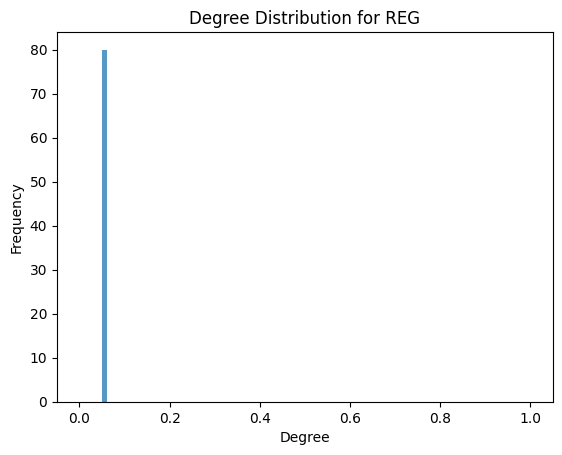

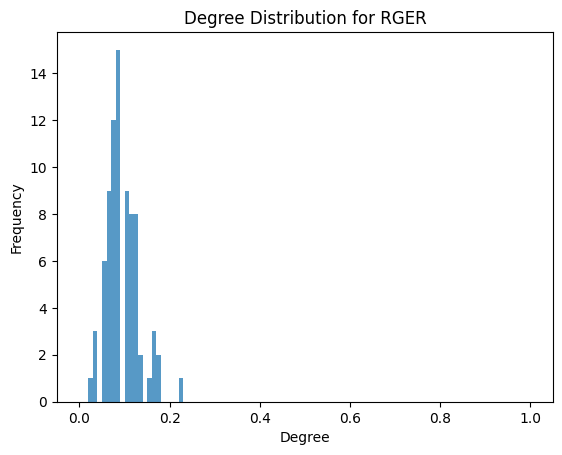

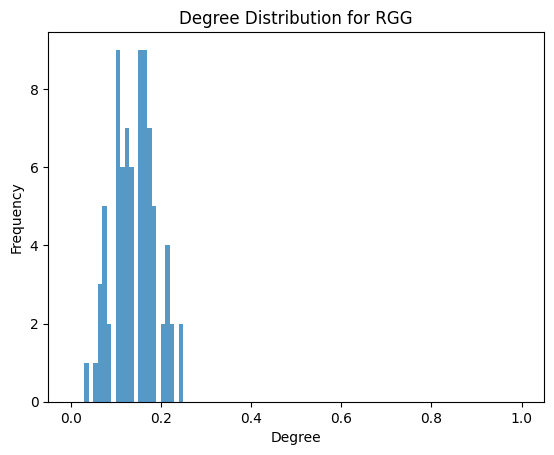

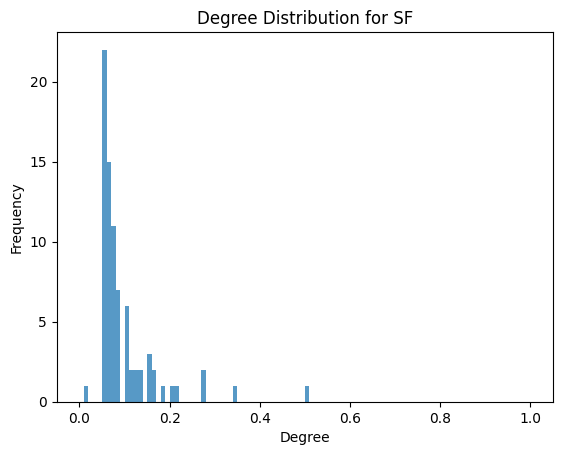

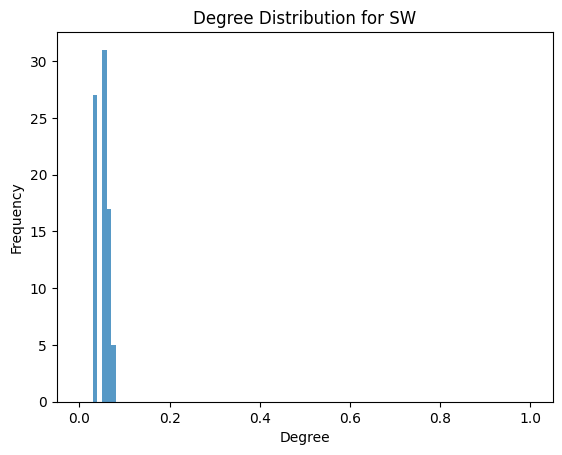

Mean degree for REG: 4.0
Mean degree normalized for REG: 0.05063291139240507
Mean degree for RGER: 7.5
Mean degree normalized for RGER: 0.09493670886075949
Mean degree for RGG: 11.25
Mean degree normalized for RGG: 0.14240506329113925
Mean degree for SF: 7.6
Mean degree normalized for SF: 0.09620253164556963
Mean degree for SW: 4.0
Mean degree normalized for SW: 0.05063291139240507


In [15]:
#1. Gegree distribution and mean degree
def plot_degree(G, graph_name):
    degrees = dict(nx.degree_centrality(G))
    plt.hist(list(degrees.values()), bins=100, alpha=0.75, range=(0, 1))
    #bins: the number of bins used in the histogram
    #range: the lower and upper range
    #alpha: the transparency of the bars
    plt.title(f'Degree Distribution for {graph_name}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

def mean_degree(G, graph_name):
    degrees = dict(nx.degree_centrality(G))
    mean_degree = np.mean(np.array(list(dict(nx.degree(G)).values())))
    print(f'Mean degree for {graph_name}: {mean_degree}')
    mean_degree_normalized = np.mean(np.array(list(degrees.values())))
    print(f'Mean degree normalized for {graph_name}: {mean_degree_normalized}')
    

for graph, graph_name in zip(graphs, graph_names):
    plot_degree(graph, graph_name)

for graph, graph_name in zip(graphs, graph_names):
    mean_degree(graph, graph_name)

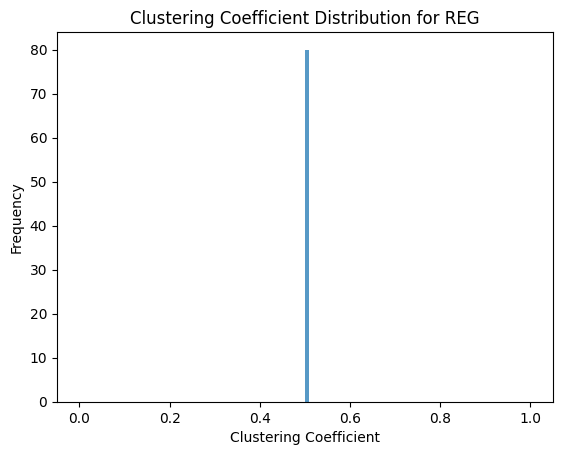

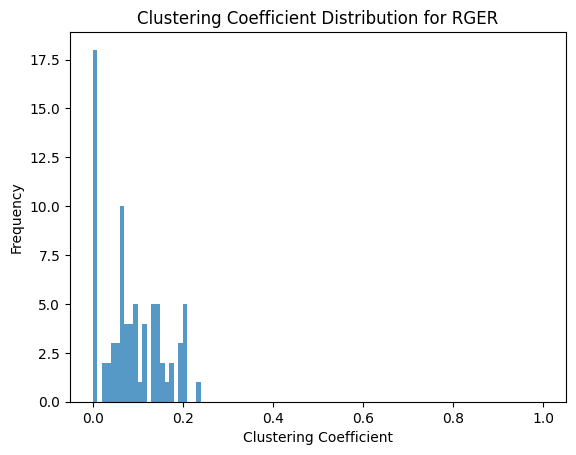

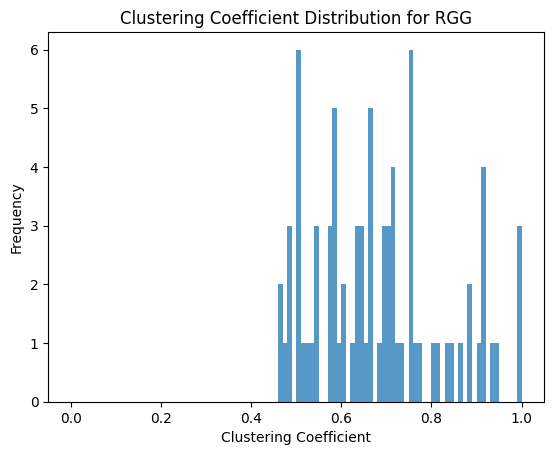

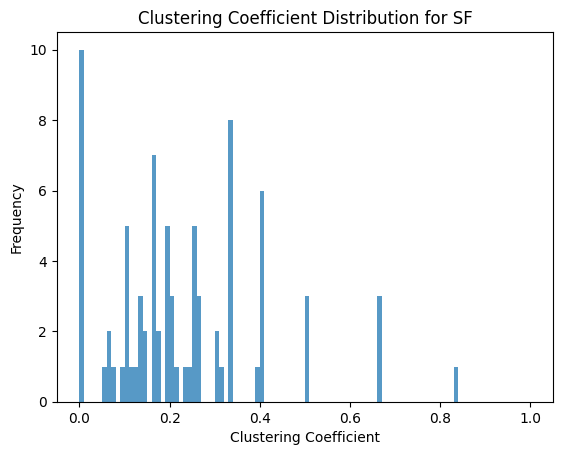

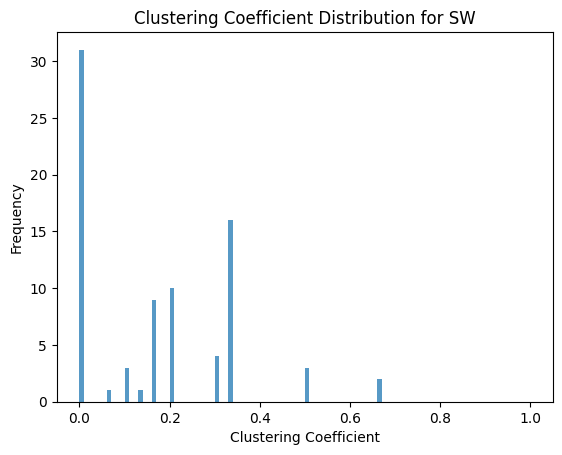

Average Clustering Coefficient for REG: 0.5
Average Clustering Coefficient for RGER: 0.08497775916893564
Average Clustering Coefficient for RGG: 0.6825788363897884
Average Clustering Coefficient for SF: 0.22922761606585143
Average Clustering Coefficient for SW: 0.16708333333333333


In [13]:
#2 Clustering coefficient
def cc(G):
    return nx.clustering(G)
def av_cc(G):
    return nx.average_clustering(G)

def plot_cc(G, graph_name):
    clustering_coeffs = cc(G) #this is a dictionary! (node: clustering coefficient)
    coeff_values = list(clustering_coeffs.values())
    
    # Plot distribution of clustering coefficients
    plt.hist(coeff_values, bins=100, alpha=0.75, range=(0, 1))
    plt.title(f'Clustering Coefficient Distribution for {graph_name}')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Frequency')
    plt.show()


for graph, graph_name in zip(graphs, graph_names):
    plot_cc(graph, graph_name)

for graph, graph_name in zip(graphs, graph_names):
    #calculate the average clustering coefficient
    avg_clustering_coeff = av_cc(graph)
    print(f'Average Clustering Coefficient for {graph_name}: {avg_clustering_coeff}')


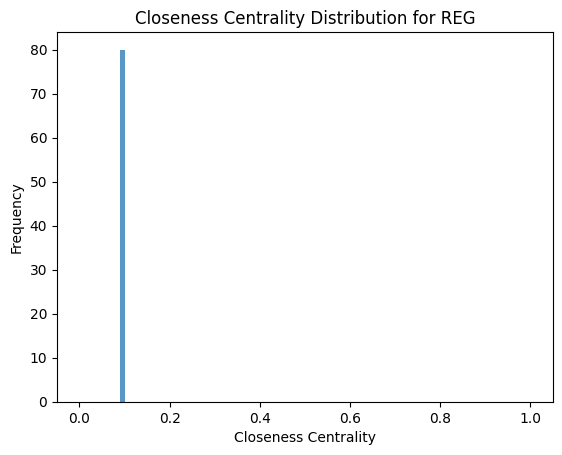

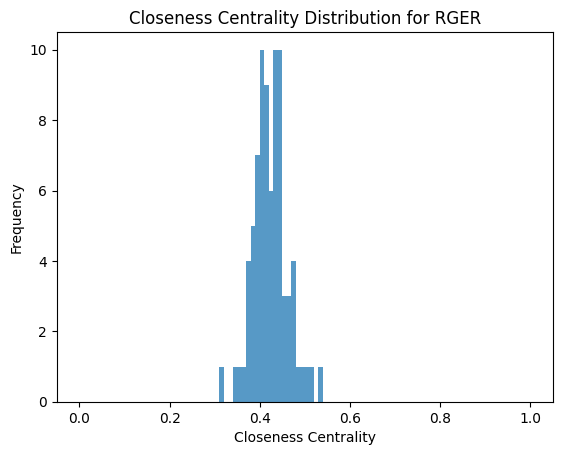

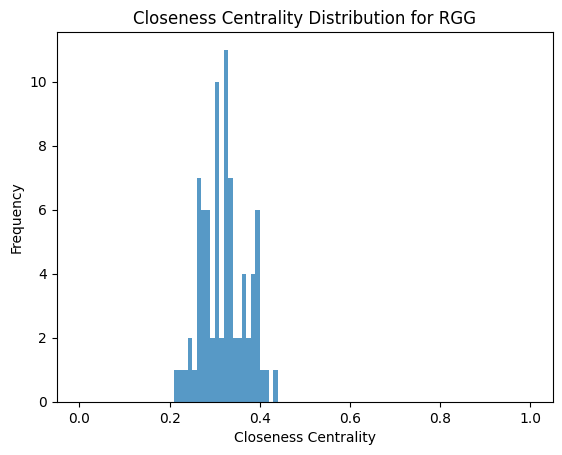

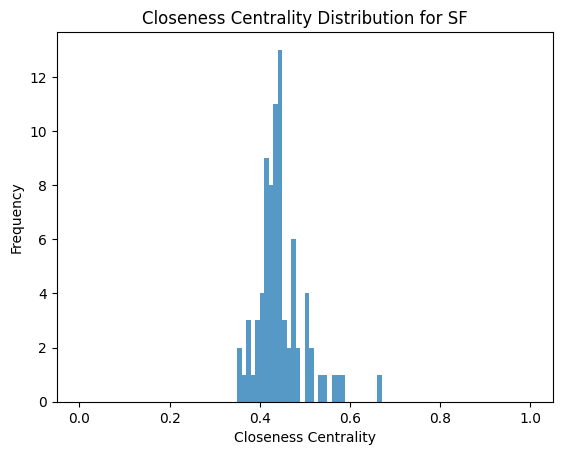

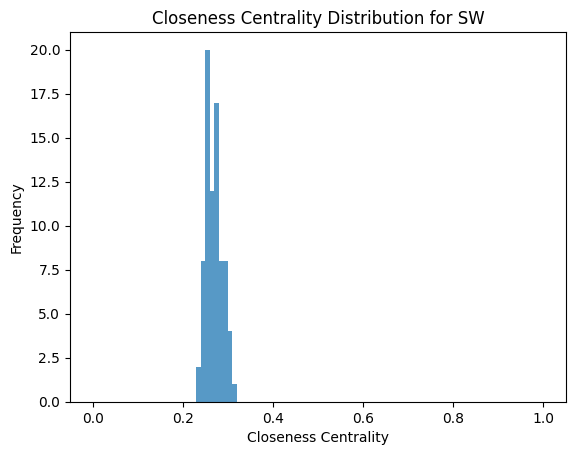

Mean closeness for REG: 0.09634146341463413
Mean closeness for RGER: 0.4242297800918761
Mean closeness for RGG: 0.320088016052558
Mean closeness for SF: 0.4464453837879834
Mean closeness for SW: 0.26914269896354603


In [17]:
#3. Closest centrality
def closeness(G):
    return nx.closeness_centrality(G)

def plot_closeness(G, graph_name):
    closeness = dict(nx.closeness_centrality(G))
    plt.hist(list(closeness.values()), bins=100, alpha=0.75, range=(0, 1))
    plt.title(f'Closeness Centrality Distribution for {graph_name}')
    plt.xlabel('Closeness Centrality')
    plt.ylabel('Frequency')
    plt.show()

def mean_closeness(G, name):
    closeness = dict(nx.closeness_centrality(G))
    mean_closeness = np.mean(np.array(list(closeness.values())))
    print(f'Mean closeness for {name}: {mean_closeness}')


for graph, graph_name in zip(graphs, graph_names):
    plot_closeness(graph, graph_name)

for graph, graph_name in zip(graphs, graph_names):
    mean_closeness(graph, graph_name)


<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

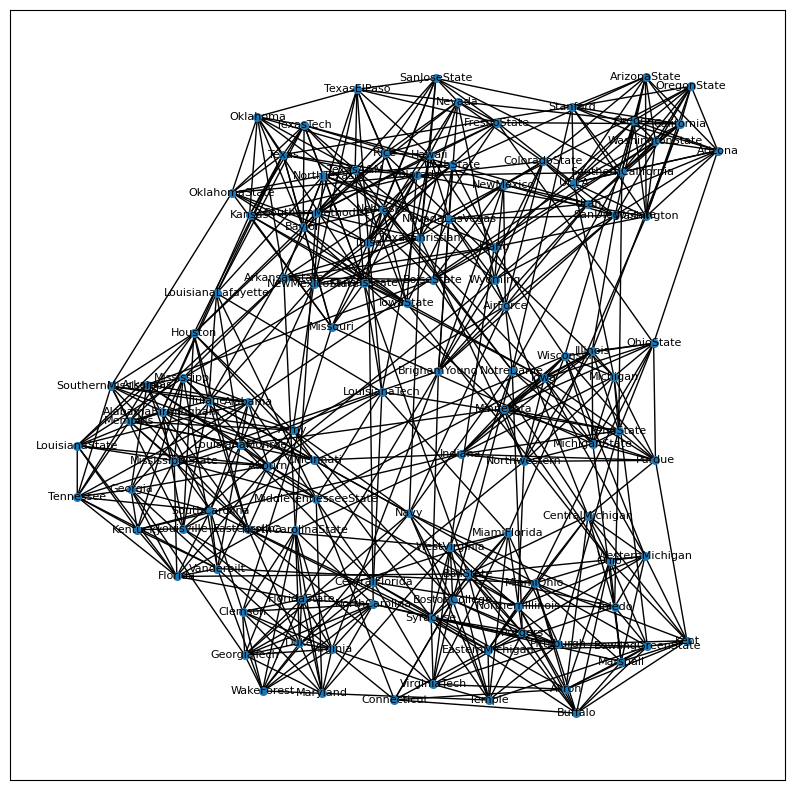

In [10]:
#football network
football=nx.read_gml(r"football.gml")

# Visualization
plt.figure(figsize=(10, 10))
nx.draw_networkx(football, with_labels=True, node_size=30, font_size=8)

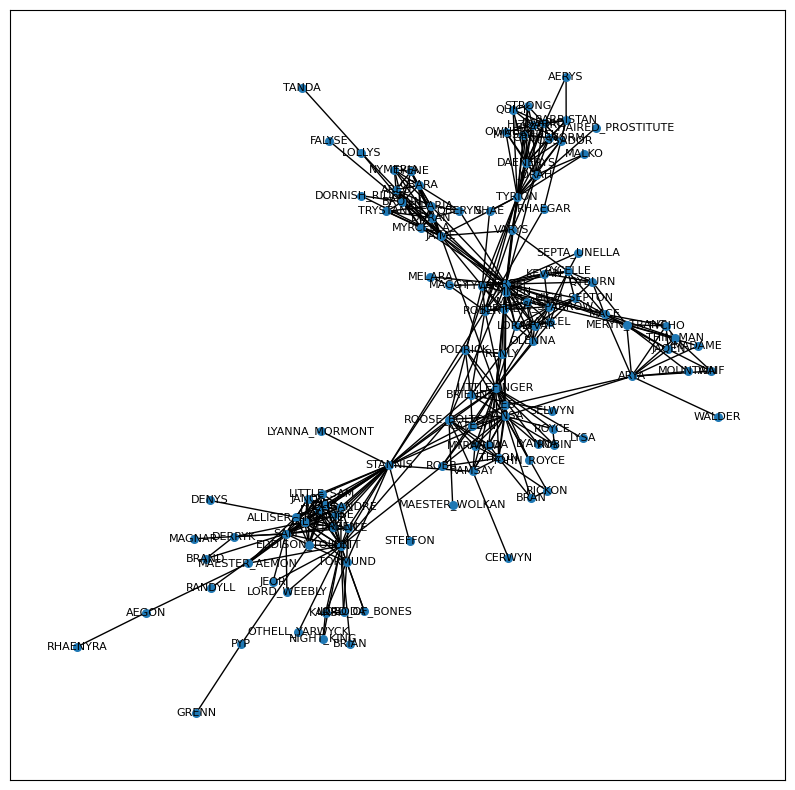

In [11]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1
    
plt.figure(figsize=(10, 10))
nx.draw_networkx(got, with_labels=True, node_size=30, font_size=8)

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

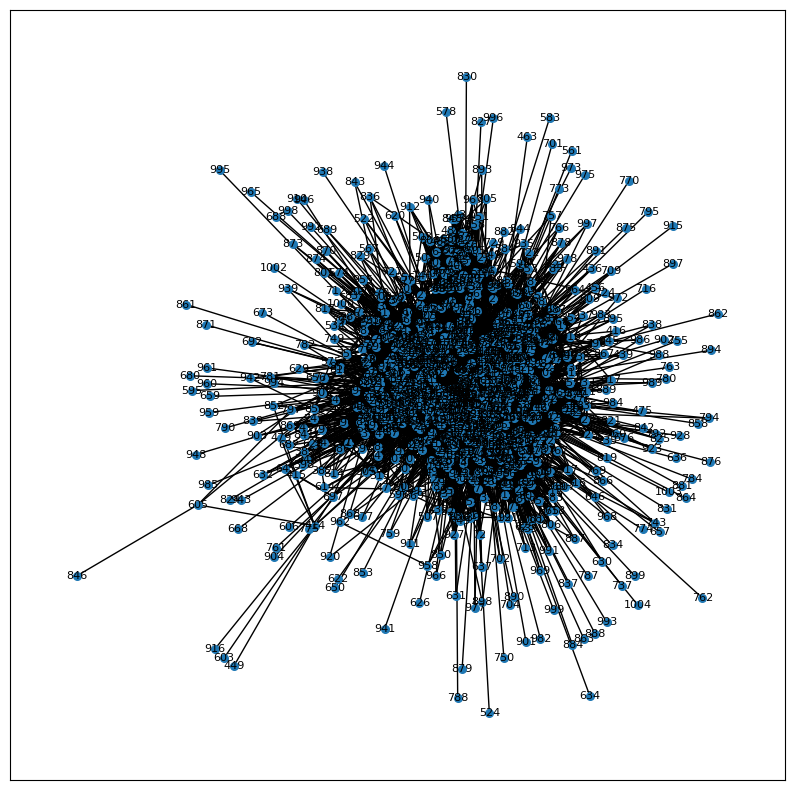

In [35]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())

#Largest connected component
largest_cc = max(nx.connected_components(eu), key=len)
eu = eu.subgraph(largest_cc).copy()
#remove self loops
eu.remove_edges_from(nx.selfloop_edges(eu))

# Visualization
plt.figure(figsize=(10, 10))
nx.draw_networkx(eu, with_labels=True, node_size=30, font_size=8)


In [36]:
#More on the email-Eu-core network
#Number of nodes and edges
print("Number of nodes: ", eu.number_of_nodes())
print("Number of edges: ", eu.number_of_edges())

Number of nodes:  986
Number of edges:  16064


<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

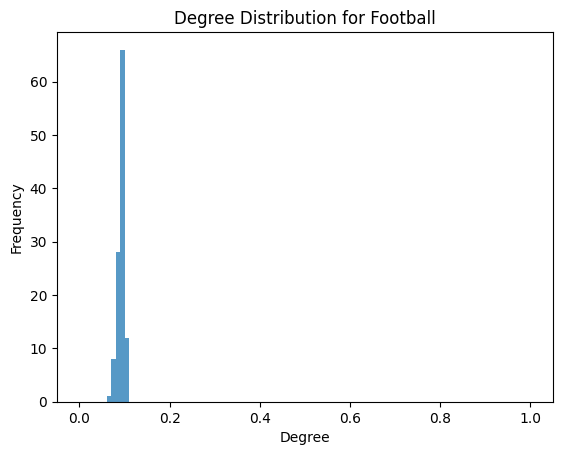

Mean degree for Football: 10.660869565217391
Mean degree normalized for Football: 0.0935163996948894


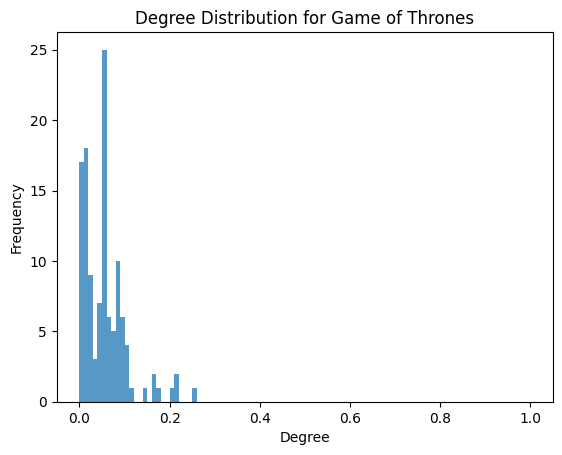

Mean degree for Game of Thrones: 6.65546218487395
Mean degree normalized for Game of Thrones: 0.05640222190571145


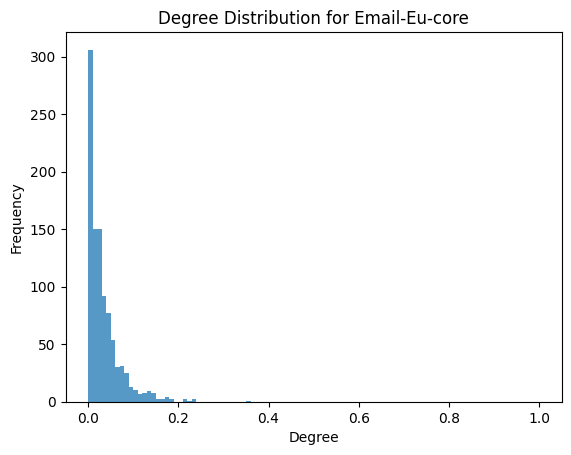

Mean degree for Email-Eu-core: 32.5841784989858
Mean degree normalized for Email-Eu-core: 0.033080384262929745


In [16]:
#Footbal network
plot_degree(football, 'Football')
mean_degree(football, 'Football')

#Game of thrones network
plot_degree(got, 'Game of Thrones')
mean_degree(got, 'Game of Thrones')

#EU network
plot_degree(eu, 'Email-Eu-core')
mean_degree(eu, 'Email-Eu-core')

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

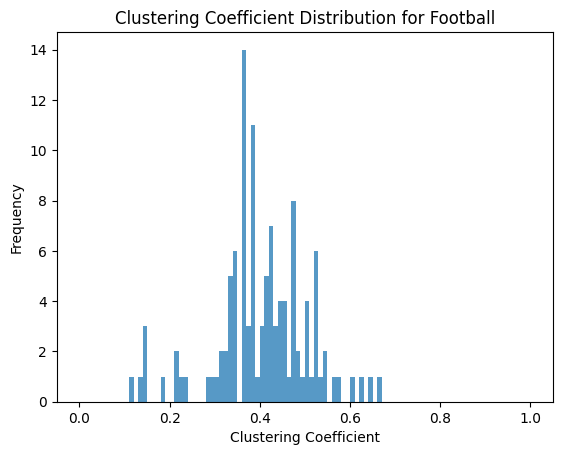

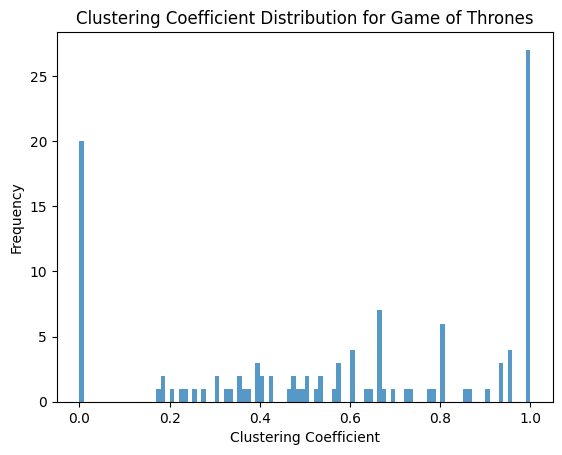

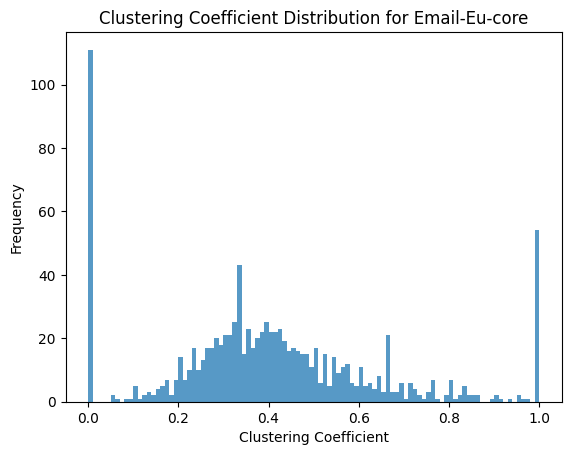

Average Clustering Coefficient for Football: 0.40321601104209814
Average Clustering Coefficient for Game of Thrones: 0.5744036387164706
Average Clustering Coefficient for Email-Eu-core: 0.40705044751953817


In [14]:
plot_cc(football, 'Football')
plot_cc(got, 'Game of Thrones')
plot_cc(eu, 'Email-Eu-core')

for graph, graph_name in zip([football, got, eu], ['Football', 'Game of Thrones', 'Email-Eu-core']):
    avg_clustering_coeff = av_cc(graph)
    print(f'Average Clustering Coefficient for {graph_name}: {avg_clustering_coeff}')

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

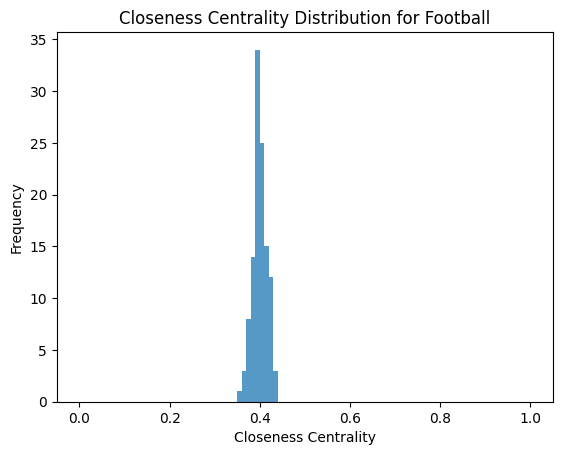

Mean closeness for Football: 0.39931907825186225


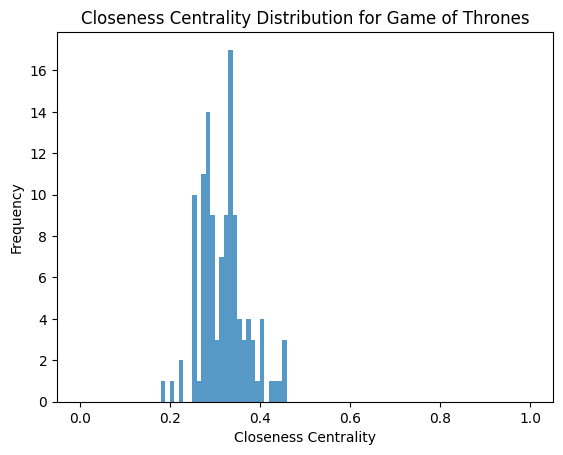

Mean closeness for Game of Thrones: 0.31905170483140755


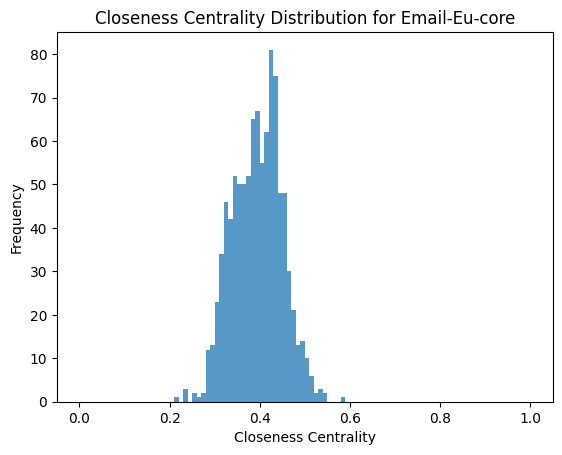

Mean closeness for Email-Eu-core: 0.39446404120869627


In [18]:
#Football network
plot_closeness(football, 'Football')
mean_closeness(football, 'Football')

#Game of thrones network
plot_closeness(got, 'Game of Thrones')
mean_closeness(got, 'Game of Thrones')

#EU network
plot_closeness(eu, 'Email-Eu-core')
mean_closeness(eu, 'Email-Eu-core')


### ΣΧΟΛΙΑ - ΠΑΡΑΤΗΡΗΣΕΙΣ

Χρησιμοποιώντας τα παραπάνω αποτελέσματα, καθώς και τα αποτελέσματα για τα συνθετικά δίκτυα που υπολογίσαμε σττην αρχή της ασκησης, μπορούμε να οδηγηθούμε σε συμπεράσματα για την κάθε τοπολογία. Συγκεκριμένα:

#### 1. Football Network:
Αρχικά η κατανομή βαθμού ταιριάζει σε δικτυα RGER, καθως οι τιμές εινια πολύ κοντινές με αυτες της RGER συνθετης τοπολογίας που δημιοιυργήσαμε πριν (οι περισσότεροι κομβοι με την ιδια μικρή τιμή, μικρη ανισοκτανομή). Το ίδιο ισχύει και για την κατανομή της κεντρικότητας εγγύτητας, η οποία παρουσιάζει μεγάλο μέγιστο και μικρή διασπορά, το οποίο συναντάμε στις RGER τοπολογίες. Για την κατανομή του συντελέστή ομαδοποίησης παρατηρούμε οτι παρουσιάζει περισσότερες ομοιότητες με ενα SW δίκτυο, αν παρατηρήσουμε τις ομοιότητες με το συνθετικο δικτυο που φτιαξαμε. Συνολικά μπορούμε να πούμε οτι το Football Network ακολουθεί RGER τοπολογία, με καποια χαρακτηριστικά απο SW.    

#### 2. Game of Thrones Network:
Αρχικά, η κατανομή βαθμού ταιριάζει με αυτή του συνθετικού δικτυου SF (φθινουσα με χαμηλές τιμές). Το ιδιο ισχύει και για την κατανομή της κεντρικότητας εγγύτητας, η οποία παρατηρούμε οτι μοιαζει με την κατανομή δικτύων SF, καθώς εχουμε λίγους κομβους που παρουσιάζουν μεγάλες τιμές. Σχετικά με την κατανομή του συντελεστή ομαδοποίησης, παρατηρούμε πολλούς κομβους με μεγάλες τιμές, το οποίο συμβαίνει μόνο στην RGG τοπολογία. Επομένως, μπορούμε να πούμε οτι το Game Of Thrones Network ακολουθεί SF τοπολογία, με καποια χαρακτηριστικά (συντελεστής ομαδοποίησης) απο RGG.

#### 3. EU Network
Για το δίκτυο αυτό μπορούμε ευκολα να παρατηρήσουμε οτι ακολουθεί SF τοπολογία. Ολα τα χαρακτηριστικα (δηλαδή όλες οι κατανομές) ταιριάζουν με αυτά μιας SF τοπολογίας. Συγκεκριμενα οι τιμές των Degree Distribution και Closeness Centrality ειναι παρόμοιες με το συνθετικό SF δίκτυο, ενώ παρατηρούμε λίγο μεγαλύτερες τιμές Clustering Coefficient, όμως ίδια κατανομή.


<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [45]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value=0):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [2]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

In [39]:
# Calculate communities in all grapshs
graphs = [REG, RGER, RGG, SF, SW, football, got, eu]
graph_names = ['REG', 'RGER', 'RGG', 'SF', 'SW', 'Football', 'Game of Thrones', 'Email-Eu-core']
print(graph_names)

['REG', 'RGER', 'RGG', 'SF', 'SW', 'Football', 'Game of Thrones', 'Email-Eu-core']


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p>
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [ ]:
import itertools
import networkx as nx
from tqdm import tqdm

# Lists to store best scores and communities
modularityScoresNG = []
performanceScoresNG = []

# Dictionary to store best communities
bestCommsNG = {}

def findClusters_NG(G, Gname, metric, k=50):
    # G: Ο γράφος
    # Gname: Το όνομα του γράφου
    # metric: Ο δείκτης ποιότητας (modularity ή performance)
    # k: Ο μεγιστος αριθμός των κοινοτήτων που θέλουμε να βρούμε 
    bestModularity = -1
    bestPerformance = 0
    
    # Γεννήτρια κοινοτήτων από τον αλγόριθμο Girvan-Newman
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    # Θελω ομως μόνο τις k πρώτες κοινότητες
    limited = itertools.takewhile(lambda c: len(c) < k, comp)
    
    # Ευρεση της καλύτερης κοινότητας με βάση τον δείκτη ποιότητας (modularity ή performance)
    for communities in tqdm(limited, desc=f"Processing {Gname} with {metric}"):
        if metric == "modularity":
            modularity = nx.algorithms.community.quality.modularity(G, communities)
            if modularity > bestModularity:
                bestModularity = modularity
                bestComm = communities
        else:
            performance = nx.algorithms.community.quality.partition_quality(G, communities)[1]
            if performance > bestPerformance:
                bestPerformance = performance
                bestComm = communities
    
    # Αποθήκευση αποτελεσμάτων
    bestCommsNG[Gname + " " + metric] = [list(item) for item in bestComm]
    
    if metric == "modularity":
        modularityScoresNG.append(bestModularity)
    else:
        performanceScoresNG.append(bestPerformance)


In [ ]:
for graph, graph_name in zip(graphs, graph_names):
    findClusters_NG(graph, graph_name, 'modularity')
    findClusters_NG(graph, graph_name, 'performance')

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,50 Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [ ]:
# Lists to store best scores and communities
modularityScoresSC = []
performanceScoresSC = []

# Dictionary to store best communities
# Dictionary to store the best communities for Spectral Clustering
best_communities_SC = {}

def findClusters_SC(G, Gname, metric, k=50):
    G_new, G_dict = conv2int(G)  # Convert string nodes to integers
    adj_matrix = nx.to_numpy_array(G_new)  # Calculate adjacency matrix

    # Initialize variables to store the best modularity and performance
    bestModularity = -1
    bestPerformance = 0
    bestcommunity = None  # Store the best community partition

    for n_clusters in range(1, k + 1):
        # Spectral Clustering with specified number of clusters
        clustering = SpectralClustering(
            n_clusters=n_clusters,
            assign_labels='discretize',
            affinity='precomputed',
            random_state=0
        )
        communities = clustering.fit_predict(adj_matrix)

        #Partition as a dictionary
        communities = {i: [] for i in range(n_clusters)} 
        for node, label in enumerate(communities):
            communities[label].append(list(G_new.nodes())[node])  # Map integer nodes back to original

        # Evaluate partition based on the selected metric
        if metric == "modularity":
            modularity = nx.algorithms.community.quality.modularity(G_new, list(communities.values()))
            if modularity > bestModularity:  # Update best modularity score
                bestModularity = modularity
                bestcommunity = communities
        elif metric == "performance":
            performance = nx.algorithms.community.quality.partition_quality(G_new, list(communities.values()))[1]
            if performance > bestPerformance:  # Update best performance score
                bestPerformance = performance
                bestcommunity = communities

    # Store the best result in the global dictionary
    best_communities_SC[f"{Gname} {metric}"] = list(bestcommunity.values())

    # Store the results in the corresponding list
    if metric == "modularity":
        modularityScoresSC.append(bestModularity)
    elif metric == "performance":
        performanceScoresSC.append(bestPerformance)


In [ ]:
for graph, graph_name in zip(graphs, graph_names):
    findClusters_SC(graph, graph_name, 'modularity')
    findClusters_SC(graph, graph_name, 'performance')

{'REG modularity': [[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67], [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]], 'REG performance': [[61, 62, 63, 64], [7, 8, 9, 10], [76, 77, 78, 79], [36, 37, 38, 39], [18, 19, 20, 21], [25, 26, 27, 28], [47, 48, 49, 50], [65, 66, 67, 68], [54, 55, 56, 57], [14, 15, 16, 17], [29, 30, 31], [3, 4, 5, 6], [72, 73, 74, 75], [43, 44, 45, 46], [58, 59, 60], [40, 41, 42], [69, 70, 71], [0, 1, 2], [32, 33, 34, 35], [11, 12, 13], [51, 52, 53], [22, 23, 24]]}
Number of communities in REG with modularity:  7
[0.7256250000000001, 0.7256250000000001]
[0.9746835443037974, 0.9746835443037974]


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [55]:
#Lists to store best scores and communities
modularityScoresMM = []
performanceScoresMM = []

#Dictionary to store best communities
best_communities_MM = {}

def findClusters_MM(G, Gname):
    communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)

    #Calculate modularity and performance
    modularity = nx.algorithms.community.quality.modularity(G, communities)
    performance = nx.algorithms.community.quality.partition_quality(G, communities)[1]
    
    #Store the results
    best_communities_MM[Gname] = [list(item) for item in communities]
    modularityScoresMM.append(modularity)
    performanceScoresMM.append(performance)


In [ ]:
for graph, graph_name in zip(graphs, graph_names):
    findClusters_MM(graph, graph_name)

In [ ]:
# Show Results
import pandas as pd

# Show number of communities is every graph in a table using pandas
df = pd.DataFrame()
df['Graph'] = graph_names
df['Number of Communities NG Modularity'] = [len(item) for item in bestCommsNG.values() if 'modularity' in item]
df['Number of Communities NG Performance'] = [len(item) for item in bestCommsNG.values() if 'performance' in item]
df['Number of Communities SC Modularity'] = [len(item) for item in best_communities_SC.values() if 'modularity' in item]
df['Number of Communities SC Performance'] = [len(item) for item in best_communities_SC.values() if 'performance' in item]
df['Number of Communities MM'] = [len(item) for item in best_communities_MM.values()]

# Show Scores of the best partition in every graph in a table using pandas
df2 = pd.DataFrame()
df2['Graph'] = graph_names
df2['Modularity NG'] = modularityScoresNG
df2['Performance NG'] = performanceScoresNG
df2['Modularity SC'] = modularityScoresSC
df2['Performance SC'] = performanceScoresSC
df2['Modularity MM'] = modularityScoresMM
df2['Performance MM'] = performanceScoresMM


### Σχολια - Παρατηρήσεις:


#### Οπτικοποιηση:

In [56]:
def visualize(G, communities, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))
    for i, comm in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=comm, node_color=colors[i], node_size=30)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(title)
    plt.show()

#### Οπτικοποίηση κοινοτήτων American College Football

#### Οπτικοποίηση κοινοτήτων Game of Thrones

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

#### Οπτικοποίηση κοινοτήτων REG

#### Οπτικοποίηση κοινοτήτων RGER

#### Οπτικοποίηση κοινοτήτων RGG

#### Οπτικοποίηση κοινοτήτων SW

#### Οπτικοποίηση κοινοτήτων SF